<a href="https://colab.research.google.com/github/PGV1000/data_mining/blob/main/%D0%9C%D0%B5%D0%B4%D0%B2%D0%B5%D0%B4%D0%B5%D0%B2_%D0%9F%D0%A0_%E2%84%9610_%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B8_%D1%81%D0%B5%D0%B3%D0%BC%D0%B5%D0%BD%D1%82%D0%B0%D1%86%D0%B8%D1%8F_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D1%81_%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E_%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%D0%BE%D0%B2_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Практическая работа №10. Анализ и сегментация клиентов с помощью алгоритмов кластеризации**

### **Цель работы:**

Разработать систему сегментации клиентов для розничной компании с использованием алгоритмов кластеризации. Это позволит компании лучше понимать своих клиентов, персонализировать маркетинговые кампании и оптимизировать бизнес-процессы.

### **Введение:**

Розничные компании сталкиваются с большим объемом данных о своих клиентах, включая историю покупок, демографическую информацию и поведенческие характеристики. Однако без должного анализа эти данные остаются неиспользованными. Сегментация клиентов позволяет выделить группы с общими характеристиками, чтобы более эффективно таргетировать предложения и улучшить удовлетворенность клиентов.



### **Задачи:**

1. **Сбор и анализ данных о клиентах.**
2. **Предобработка и подготовка данных для моделирования.**
3. **Применение различных алгоритмов кластеризации для сегментации клиентов.**
4. **Оценка качества кластеризации с использованием внутренних и внешних метрик.**
5. **Интерпретация и визуализация результатов.**
6. **Формирование рекомендаций для бизнес-стратегии компании на основе полученных сегментов.**



### **Пошаговое описание рабочего процесса (пайплайна):**

#### **Шаг 1: Сбор и анализ данных**

**1.1. Выбор набора данных:**

- Используйте датасет "Online Retail II" из [UCI Machine Learning Repository](https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci) или другой открытый набор данных, содержащий информацию о транзакциях клиентов.
- Данные должны включать:
  - Идентификаторы клиентов.
  - Информацию о покупках (товары, количество, стоимость).
  - Дату и время транзакций.
  - Демографические данные (если доступны): возраст, пол, локация и т.д.


In [1]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# Download latest version
path = kagglehub.dataset_download("mashlyn/online-retail-ii-uci")
!cp -r {path} .
print("Path to dataset files:", path)

100%|██████████| 14.5M/14.5M [00:00<00:00, 38.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mashlyn/online-retail-ii-uci/versions/3


In [3]:
ds = pd.read_csv('/content/3/online_retail_II.csv')
ds.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom



**1.2. Первичный анализ данных (EDA):**

- Изучите структуру данных и их распределение.
- Определите основные характеристики данных:
  - Общий объем продаж.
  - Частота покупок по клиентам.
  - Распределение выручки по товарам.
- Выявите тенденции и аномалии.

Изучите структуру данных и их распределение.

In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [5]:
ds.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [6]:
numeric_columns = ['Quantity', 'Price']

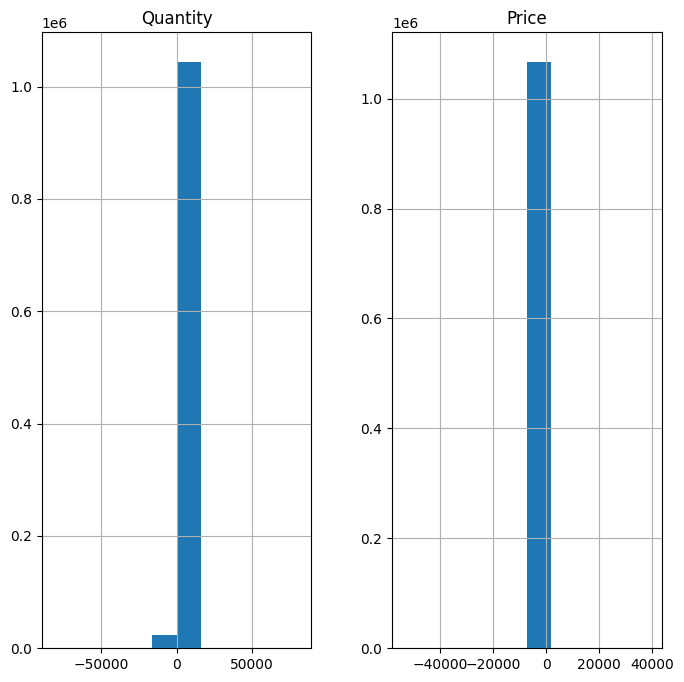

In [7]:
ds[numeric_columns].hist(figsize=(8, 8))
plt.show()

Общий объем продаж

In [8]:
total_sales = ds['Quantity'] * ds['Price']
total_sales = total_sales.sum()
print(f"Общий объем продаж: {total_sales}")
print("Общий объем продаж (шт.):", ds['Quantity'].sum())

Общий объем продаж: 19287250.56799999
Общий объем продаж (шт.): 10608492


Частота покупок по клиентам.

In [9]:
purchases_by_customer = ds['Customer ID'].value_counts()
purchases_by_customer.head()

,count
Customer ID,
17841.0,13097
14911.0,11613
12748.0,7307
14606.0,6709
14096.0,5128


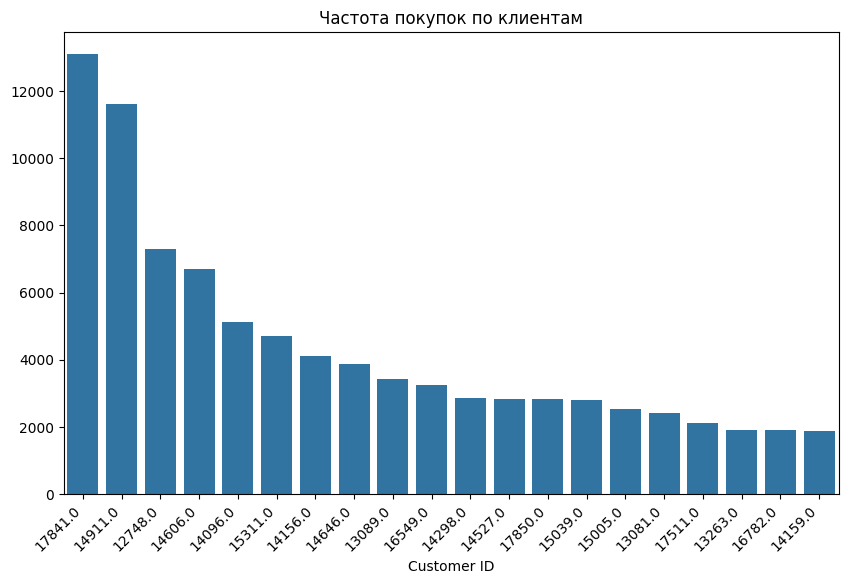

In [10]:
highest_purchasers = purchases_by_customer.sort_values(ascending=False).head(20)
plt.figure(figsize=(10, 6))
sns.barplot(x=highest_purchasers.index, y=highest_purchasers.values,
           order=highest_purchasers.index)
plt.title('Частота покупок по клиентам')
plt.xticks(rotation=45, ha='right')
plt.show()

Распределение выручки по товарам.

In [11]:
revenue_by_product = ds.groupby('StockCode')['Price'].sum()
print("\nРаспределение выручки по товарам:\n", revenue_by_product.head())


Распределение выручки по товарам:
 StockCode
10002     391.66
10002R     15.40
10080      14.14
10109       0.42
10120      18.58
Name: Price, dtype: float64


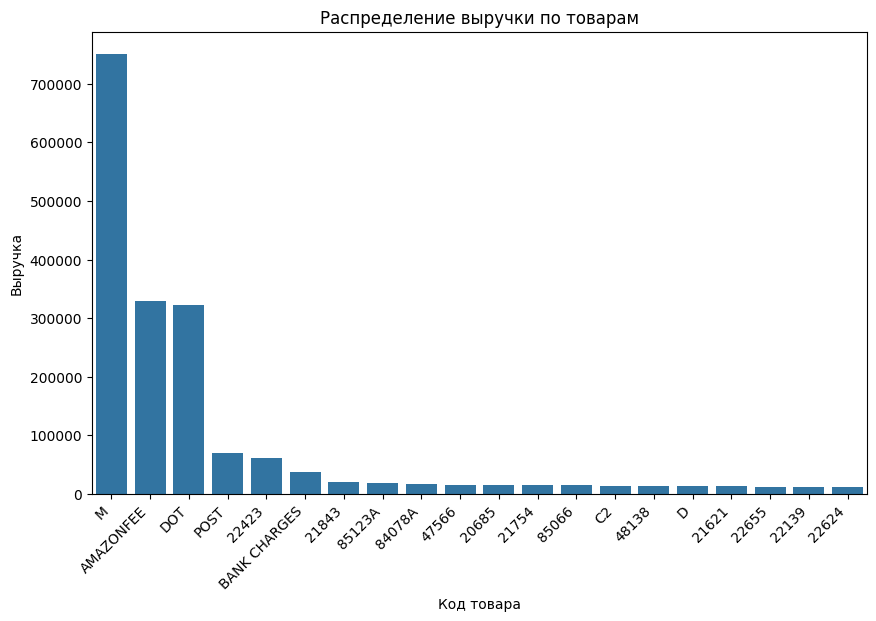

In [12]:
highest_revenue_products = revenue_by_product.sort_values(ascending=False).head(20)
plt.figure(figsize=(10, 6))
sns.barplot(x=highest_revenue_products.index, y=highest_revenue_products.values)
plt.title('Распределение выручки по товарам')
plt.xlabel('Код товара')
plt.ylabel('Выручка')
plt.xticks(rotation=45, ha='right')
plt.show()

Выявите тенденции и аномалии.

In [13]:
ds['Year'] = pd.to_datetime(ds['InvoiceDate']).dt.year
ds['Month'] = pd.to_datetime(ds['InvoiceDate']).dt.month
ds['Day'] = pd.to_datetime(ds['InvoiceDate']).dt.day
ds


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Month,Day
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,12,1
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,12,1
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,12,1
...,...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12,9
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,9
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,9
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011,12,9


In [14]:
purchases_by_year = ds.groupby('Year').size()
purchases_by_month = ds.groupby('Month').size()
purchases_by_day = ds.groupby('Day').size()

Text(0.5, 1.0, 'Частота покупок по годам')

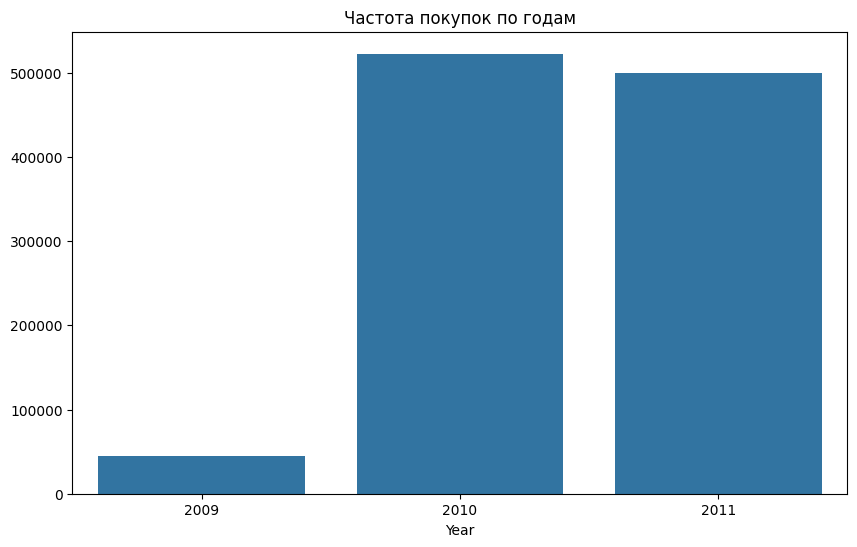

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x=purchases_by_year.index, y=purchases_by_year.values)
plt.title('Частота покупок по годам')

<Axes: xlabel='Month'>

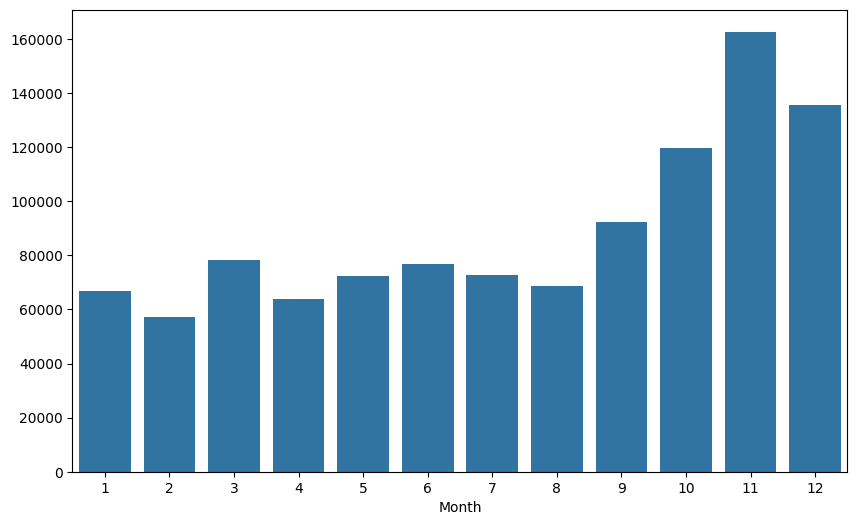

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x=purchases_by_month.index, y=purchases_by_month.values)

Text(0.5, 1.0, 'Частота покупок по дням')

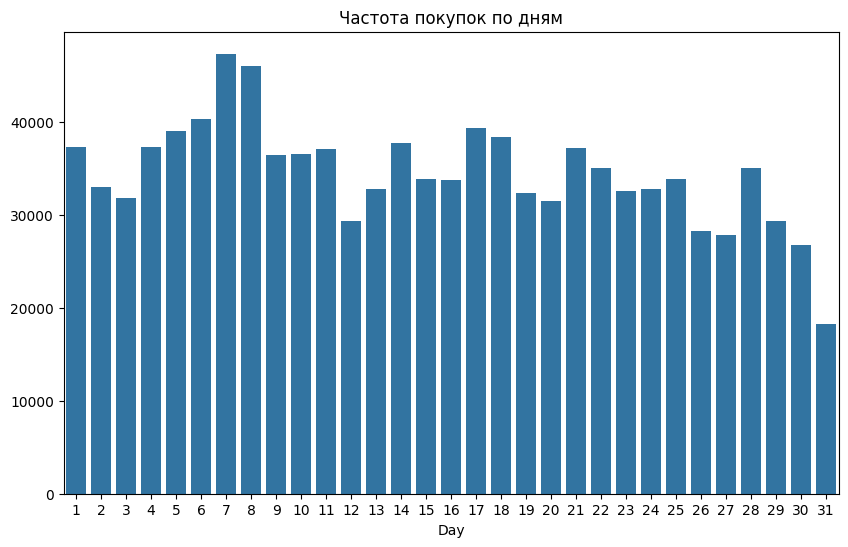

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x=purchases_by_day.index, y=purchases_by_day.values)
plt.title('Частота покупок по дням')

In [18]:
anomalies_quantity = ds[ds['Quantity'] < 0]
anomalies_price = ds[ds['Price'] < 0]
print("Количество записей с отрицательным количеством:", len(anomalies_quantity))
print("Количество записей с отрицательной ценой:", len(anomalies_price))

Количество записей с отрицательным количеством: 22950
Количество записей с отрицательной ценой: 5


In [19]:
purchases_by_country = ds['Country'].value_counts()
purchases_by_country.head()

,count
Country,
United Kingdom,981330
EIRE,17866
Germany,17624
France,14330
Netherlands,5140


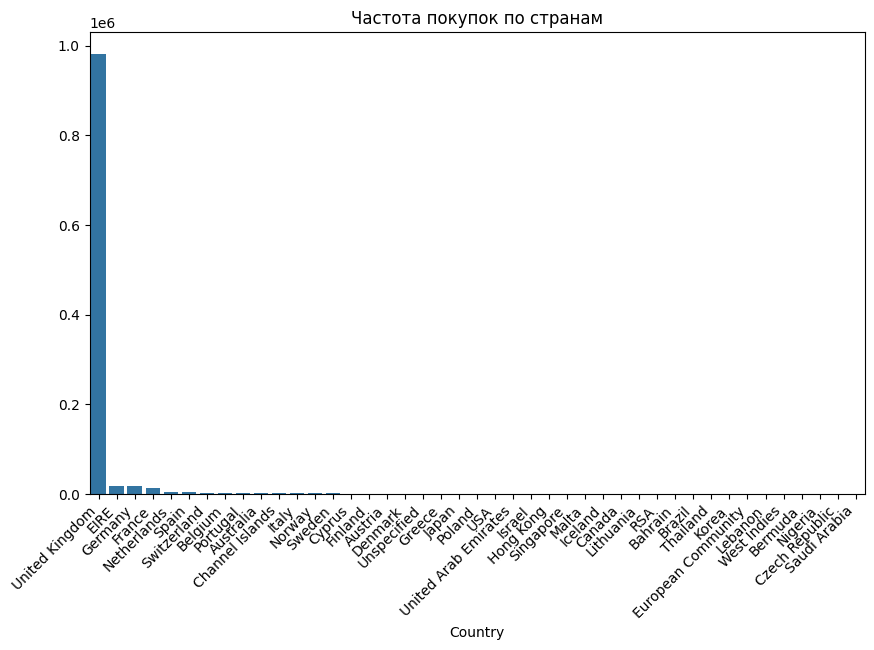

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(x=purchases_by_country.index, y=purchases_by_country.values)
plt.title('Частота покупок по странам')
plt.xticks(rotation=45, ha='right')
plt.show()

#### **Шаг 2: Предобработка данных**

**2.1. Работа с пропущенными значениями:**

- Проанализируйте наличие пропущенных данных.
- Решите, как справиться с ними:
  - Удаление строк/столбцов с пропущенными значениями.
  - Заполнение пропущенных значений средним, медианой или наиболее частым значением.

In [21]:
ds['InvoiceDate'] = pd.to_datetime(ds['InvoiceDate'])
ds['Description'] = ds['Description'].fillna('Unknown')
random_ids = np.random.choice(ds['Customer ID'].dropna().unique(), size=ds['Customer ID'].isnull().sum(), replace=True)
ds.loc[ds['Customer ID'].isnull(), 'Customer ID'] = random_ids
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 11 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1067371 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  1067371 non-null  float64       
 7   Country      1067371 non-null  object        
 8   Year         1067371 non-null  int32         
 9   Month        1067371 non-null  int32         
 10  Day          1067371 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(1), object(4)
memory usage: 77.4+ MB



**2.2. Обработка выбросов:**

- Выявите выбросы в данных (например, аномально большие заказы).
- Решите, следует ли их удалить или обработать иным образом.

<Axes: >

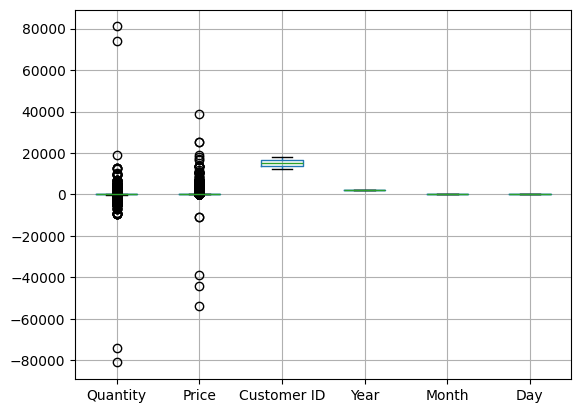

In [22]:
ds.boxplot()

<Axes: >

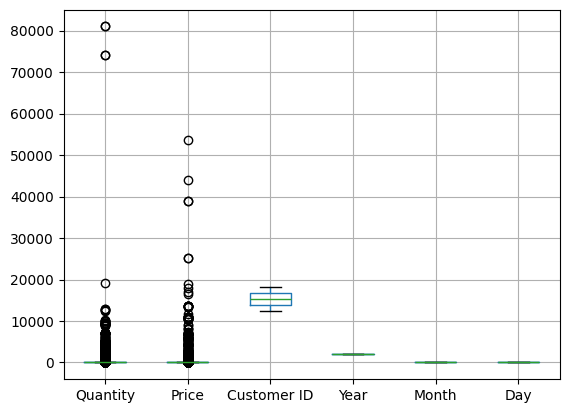

In [23]:
ds['Quantity'] = ds['Quantity'].abs()
ds['Price'] = ds['Price'].abs()
ds.boxplot()

<Axes: >

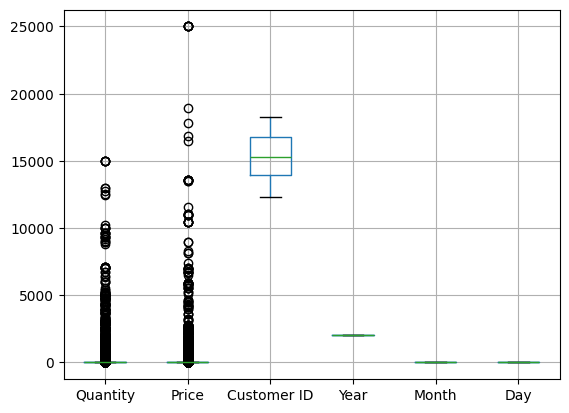

In [24]:
ds['Quantity'] = ds['Quantity'].clip(0, 15000)
ds['Price'] = ds['Price'].clip(0, 25000)
ds.boxplot()

In [25]:
ds = ds.drop(ds[ds['Price'] == 0].index)
ds.describe()

,Quantity,InvoiceDate,Price,Customer ID,Year,Month,Day
count,1.061169e+06,1061169,1.061169e+06,1.061169e+06,1.061169e+06,1.061169e+06,1.061169e+06
mean,1.098480e+01,2011-01-03 06:21:16.430991872,4.904242e+00,1.532356e+04,2.010426e+03,7.501740e+00,1.513857e+01
min,1.000000e+00,2009-12-01 07:45:00,1.000000e-03,1.234600e+04,2.009000e+03,1.000000e+00,1.000000e+00
25%,1.000000e+00,2010-07-09 15:48:00,1.250000e+00,1.393100e+04,2.010000e+03,5.000000e+00,8.000000e+00
50%,3.000000e+00,2010-12-07 15:31:00,2.100000e+00,1.527200e+04,2.010000e+03,8.000000e+00,1.500000e+01
75%,1.000000e+01,2011-07-22 14:53:00,4.150000e+00,1.679700e+04,2.011000e+03,1.100000e+01,2.200000e+01
max,1.500000e+04,2011-12-09 12:50:00,2.500000e+04,1.828700e+04,2.011000e+03,1.200000e+01,3.100000e+01
std,7.481624e+01,NaN,1.015127e+02,1.701517e+03,5.738515e-01,3.525371e+00,8.678136e+00


**2.3. Создание новых признаков:**

- Рассчитайте Recency, Frequency, Monetary Value (RFM-анализ):
  - **Recency (давность):** Время с момента последней покупки.
  - **Frequency (частота):** Количество покупок за определенный период.
  - **Monetary (сумма):** Общая сумма покупок.
- Создайте дополнительные признаки, такие как средний чек, предпочтительные категории товаров и т.д.


In [26]:
latest_date = ds['InvoiceDate'].max()
rfm = ds.groupby('Customer ID').agg({'InvoiceDate': lambda x: (latest_date - x.max()).days,
                                        'Invoice': lambda x: len(x),
                                        'Price': lambda x: x.sum()})

rfm['InvoiceDate'] = rfm['InvoiceDate'].astype(int)
rfm.rename(columns={'InvoiceDate': 'recency',
                         'Invoice': 'frequency',
                         'Price': 'monetary'}, inplace=True)

rfm['avg_check'] = rfm['monetary'] / rfm['frequency']
rfm['preffered_category'] = ds.groupby(['Customer ID', 'Description']).size().groupby('Customer ID').idxmax()
rfm

,recency,frequency,monetary,avg_check,preffered_category
Customer ID,,,,,
12346.0,7,90,773.60,8.595556,"(12346.0, Manual)"
12347.0,1,299,864.25,2.890468,"(12347.0, 3D DOG PICTURE PLAYING CARDS)"
12348.0,16,90,339.72,3.774667,"(12348.0, POSTAGE)"
12349.0,3,223,1740.51,7.804978,"(12349.0, STRAWBERRY CERAMIC TRINKET BOX)"
12350.0,1,43,224.65,5.224419,"(12350.0, CHOCOLATE CALCULATOR)"
...,...,...,...,...,...
18283.0,1,1030,1922.51,1.866515,"(18283.0, LUNCH BAG BLACK SKULL.)"
18284.0,1,64,301.20,4.706250,"(18284.0, CARRIAGE)"
18285.0,3,47,240.23,5.111277,"(18285.0, RIDGED GLASS T-LIGHT HOLDER)"


In [27]:
ds = ds.merge(rfm, on='Customer ID', how='left')
ds

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Month,Day,recency,frequency,monetary,avg_check,preffered_category
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,12,1,3,124,1624.96,13.104516,"(13085.0, RECORD FRAME 7"" SINGLE SIZE )"
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1,3,124,1624.96,13.104516,"(13085.0, RECORD FRAME 7"" SINGLE SIZE )"
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,1,3,124,1624.96,13.104516,"(13085.0, RECORD FRAME 7"" SINGLE SIZE )"
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,12,1,3,124,1624.96,13.104516,"(13085.0, RECORD FRAME 7"" SINGLE SIZE )"
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,12,1,3,124,1624.96,13.104516,"(13085.0, RECORD FRAME 7"" SINGLE SIZE )"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061164,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12,9,0,89,372.67,4.187303,"(12680.0, ALARM CLOCK BAKELIKE GREEN)"
1061165,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,9,0,89,372.67,4.187303,"(12680.0, ALARM CLOCK BAKELIKE GREEN)"
1061166,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,9,0,89,372.67,4.187303,"(12680.0, ALARM CLOCK BAKELIKE GREEN)"
1061167,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011,12,9,0,89,372.67,4.187303,"(12680.0, ALARM CLOCK BAKELIKE GREEN)"







**2.4. Нормализация и масштабирование:**

- Примените стандартизацию или нормализацию к числовым признакам для приведения их к единому масштабу.
- Объясните выбор метода масштабирования.

In [28]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061169 entries, 0 to 1061168
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   Invoice             1061169 non-null  object        
 1   StockCode           1061169 non-null  object        
 2   Description         1061169 non-null  object        
 3   Quantity            1061169 non-null  int64         
 4   InvoiceDate         1061169 non-null  datetime64[ns]
 5   Price               1061169 non-null  float64       
 6   Customer ID         1061169 non-null  float64       
 7   Country             1061169 non-null  object        
 8   Year                1061169 non-null  int32         
 9   Month               1061169 non-null  int32         
 10  Day                 1061169 non-null  int32         
 11  recency             1061169 non-null  int64         
 12  frequency           1061169 non-null  int64         
 13  monetary    

In [29]:
numeric_columns = ['Quantity', 'Price', 'recency', 'frequency', 'monetary', 'avg_check']
ds[numeric_columns].describe()

,Quantity,Price,recency,frequency,monetary,avg_check
count,1.061169e+06,1.061169e+06,1.061169e+06,1.061169e+06,1.061169e+06,1.061169e+06
mean,1.098480e+01,4.904242e+00,4.073438e+00,9.024089e+02,3.580598e+03,4.904242e+00
std,7.481624e+01,1.015127e+02,6.437321e+00,2.078398e+03,9.446686e+03,1.395853e+01
min,1.000000e+00,1.000000e-03,0.000000e+00,2.400000e+01,9.195000e+01,1.282381e+00
25%,1.000000e+00,1.250000e+00,0.000000e+00,1.250000e+02,5.085200e+02,2.858593e+00
50%,3.000000e+00,2.100000e+00,2.000000e+00,2.950000e+02,1.066090e+03,3.502006e+00
75%,1.000000e+01,4.150000e+00,6.000000e+00,6.820000e+02,2.329290e+03,4.380000e+00
max,1.500000e+04,2.500000e+04,9.800000e+01,1.313300e+04,7.172552e+04,6.901386e+02


In [30]:
scaler = StandardScaler()
ds[numeric_columns] = scaler.fit_transform(ds[numeric_columns])
ds[numeric_columns].describe()

,Quantity,Price,recency,frequency,monetary,avg_check
count,1.061169e+06,1.061169e+06,1.061169e+06,1.061169e+06,1.061169e+06,1.061169e+06
mean,7.901102e-18,-1.730877e-17,-8.913514e-17,-1.681997e-17,-3.047950e-17,1.349481e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.334577e-01,-4.830176e-02,-6.327849e-01,-4.226377e-01,-3.692987e-01,-2.594730e-01
25%,-1.334577e-01,-3.599788e-02,-6.327849e-01,-3.740426e-01,-3.252018e-01,-1.465519e-01
50%,-1.067256e-01,-2.762455e-02,-3.220965e-01,-2.922488e-01,-2.661789e-01,-1.004573e-01
75%,-1.316296e-02,-7.430027e-03,2.992802e-01,-1.060476e-01,-1.324600e-01,-3.755712e-02
max,2.003445e+02,2.462263e+02,1.459095e+01,5.884627e+00,7.213636e+00,4.909073e+01


StandardScaler считается хорошим инструментом для улучшения производительности алгоритмов машинного обучения:
Центрирует данные вокруг нуля.
Масштабирует данные до единичной дисперсии.
Не предполагает какого-либо конкретного распределения признаков.
Помогает алгоритмам, которые чувствительны к масштабам признаков

In [31]:
import gc
gc.collect()

62

#### **Шаг 3: Применение алгоритмов кластеризации**

**3.1. Выбор алгоритмов:**

- **K-средних (K-Means):** Для разбиения данных на k кластеров на основе эврестического подхода.
- **Иерархическая кластеризация:** Для выявления вложенной структуры кластеров.
- **DBSCAN и OPTICS:** Для обнаружения кластеров произвольной формы и выявления выбросов.

In [32]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans, DBSCAN, OPTICS, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.utils import resample
from google.colab import drive

In [33]:
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
ds.to_csv('/content/drive/MyDrive/Maga/data_mining/laba10/ds_preprocessed.csv',index=False)

**3.2. Определение оптимального количества кластеров:**

- Для K-Means и иерархической кластеризации используйте:
  - **Метод локтя (Elbow Method):** Постройте график зависимости суммы квадратов внутрикластерных расстояний от числа кластеров.
  - **Коэффициент силуэта:** Рассчитайте для различных значений k и выберите оптимальное.

In [35]:
ds = pd.read_csv('/content/drive/MyDrive/Maga/data_mining/laba10/ds_preprocessed.csv')

In [36]:
x = ds[numeric_columns]

In [37]:
n_neighbors = range(1, 11)

In [38]:
inertia = []
for k in n_neighbors:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

In [39]:
inetria_diff = np.diff(inertia)
inertia_diff_diff = np.diff(inetria_diff)
elbow_point = np.argmin(inertia_diff_diff) + 2

Text(0.5, 1.0, 'Метод локтя')

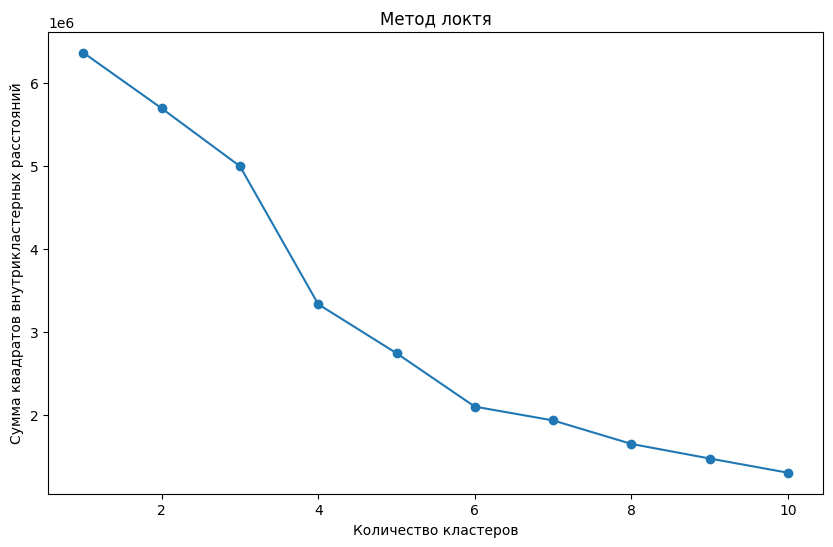

In [40]:
plt.figure(figsize=(10,6))
plt.plot(n_neighbors, inertia, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Сумма квадратов внутрикластерных расстояний')
plt.title('Метод локтя')

In [41]:
n_neighbors = range(2, 11)

In [42]:
x_silhouette = resample(x, n_samples=25000, random_state=1)

In [43]:
silhouette_scores = []
for k in n_neighbors:
    kmeans = KMeans(n_clusters=k, random_state=1)
    labels = kmeans.fit_predict(x_silhouette)
    silhouette_scores.append(silhouette_score(x_silhouette, labels))
best_k = n_neighbors[np.argmax(silhouette_scores)]

Text(0.5, 1.0, 'Оценка силуэта')

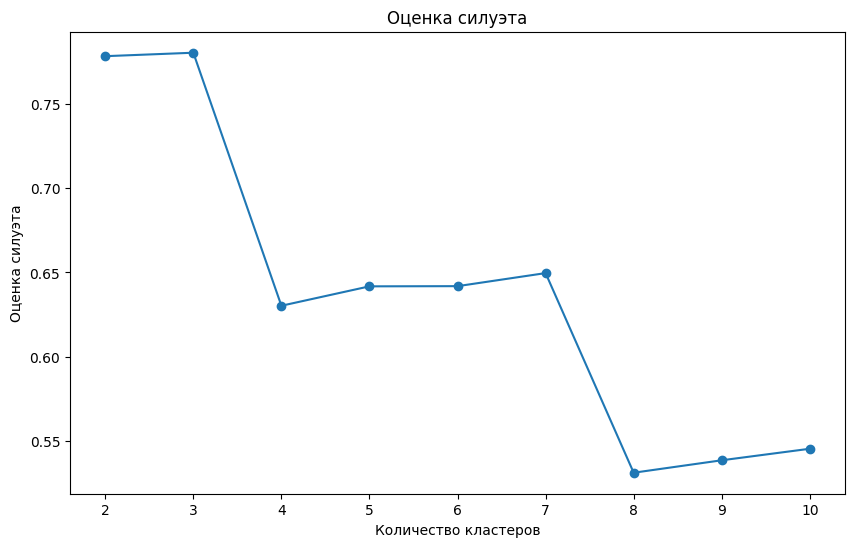

In [44]:
plt.figure(figsize=(10,6))
plt.plot(n_neighbors, silhouette_scores, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Оценка силуэта')
plt.title('Оценка силуэта')



**3.3. Применение алгоритмов:**

- Запустите каждый алгоритм на подготовленных данных.
- Сохраняйте результаты кластеризации для последующего анализа.

In [45]:
gc.collect()

35

In [46]:
ds_lite = ds.sample(n=25000, random_state=1)
x_lite = ds_lite[numeric_columns]

In [47]:
n_neighbors = 4

In [48]:
kmeans = KMeans(n_clusters=n_neighbors, random_state=1)
kmeans.fit(x_lite)

KMeans(n_clusters=4, random_state=1)

In [49]:
pred_kmeans = kmeans.predict(x_lite)
ds_lite['cluster_kmeans'] = pred_kmeans
ds_lite['cluster_kmeans'].to_csv('/content/drive/MyDrive/Maga/data_mining/laba10/pred_kmeans.csv',index=False)

In [50]:
agg_clustering = AgglomerativeClustering(n_clusters=n_neighbors)
pred_agg_clustering = agg_clustering.fit_predict(x_lite)

In [51]:
ds_lite['cluster_agg_clustering'] = pred_agg_clustering
ds_lite['cluster_agg_clustering'].to_csv('/content/drive/MyDrive/Maga/data_mining/laba10/pred_agg_clustering.csv',index=False)

In [52]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
pred_dbscan = dbscan.fit_predict(x_lite)

In [53]:
ds_lite['cluster_dbscan'] = pred_dbscan
ds_lite['cluster_dbscan'].to_csv('/content/drive/MyDrive/Maga/data_mining/laba10/pred_dbscan.csv',index=False)

In [54]:
optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05)
pred_optics = optics.fit_predict(x_lite)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_optics.py:1086: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


In [55]:
ds_lite['cluster_optics'] = pred_optics
ds_lite['cluster_optics'].to_csv('/content/drive/MyDrive/Maga/data_mining/laba10/pred_optics.csv',index=False)

In [56]:
ds_lite.to_csv('/content/drive/MyDrive/Maga/data_mining/laba10/ds_lite_clustered.csv',index=False)

#### **Шаг 4: Оценка качества кластеризации**

**4.1. Внутренние метрики:**

- **Коэффициент силуэта:** Оцените, насколько хорошо объекты расположены внутри кластеров.
- **Индекс Дэвиса-Болдина:** Оцените уровень разделимости кластеров.
- **Индекс Калинского-Харабаза:** Оцените соотношение межкластерной дисперсии к внутрикластерной.

**4.2. Внешние метрики (если доступны истинные метки):**

- **Adjusted Rand Index (ARI):** Сравните полученные кластеры с известными категориями клиентов.
- **Normalized Mutual Information (NMI):** Измерьте общую информацию между распределениями.


In [57]:
gc.collect()

1998

In [58]:
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score, davies_bouldin_score, calinski_harabasz_score, v_measure_score
from scipy.spatial.distance import cdist, pdist

In [59]:
silhouette_score_kmeans = silhouette_score(x_lite, pred_kmeans)
silhouette_score_agg_clustering = silhouette_score(x_lite, pred_agg_clustering)
silhouette_score_dbscan = silhouette_score(x_lite, pred_dbscan)
silhouette_score_optics = silhouette_score(x_lite, pred_optics)

Text(0.5, 1.0, 'Коэффициент силуэта')

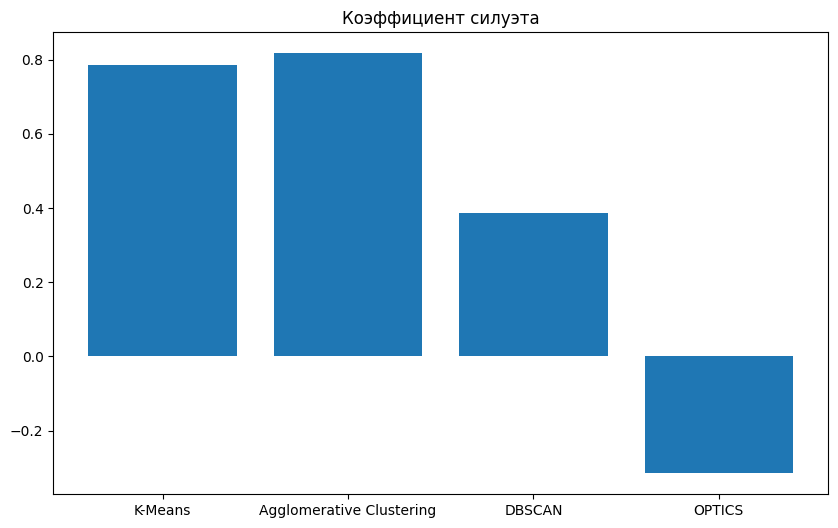

In [60]:
plt.figure(figsize=(10,6))
plt.bar(['K-Means', 'Agglomerative Clustering', 'DBSCAN', 'OPTICS'], [silhouette_score_kmeans, silhouette_score_agg_clustering, silhouette_score_dbscan, silhouette_score_optics])
plt.title('Коэффициент силуэта')


In [61]:
davies_bouldin_score_kmeans = davies_bouldin_score(x_lite, pred_kmeans)
davies_bouldin_score_agg_clustering = davies_bouldin_score(x_lite, pred_agg_clustering)
davies_bouldin_score_dbscan = davies_bouldin_score(x_lite, pred_dbscan)
davies_bouldin_score_optics = davies_bouldin_score(x_lite, pred_optics)

Text(0.5, 1.0, 'Индекс Дэвиса-Болдина')

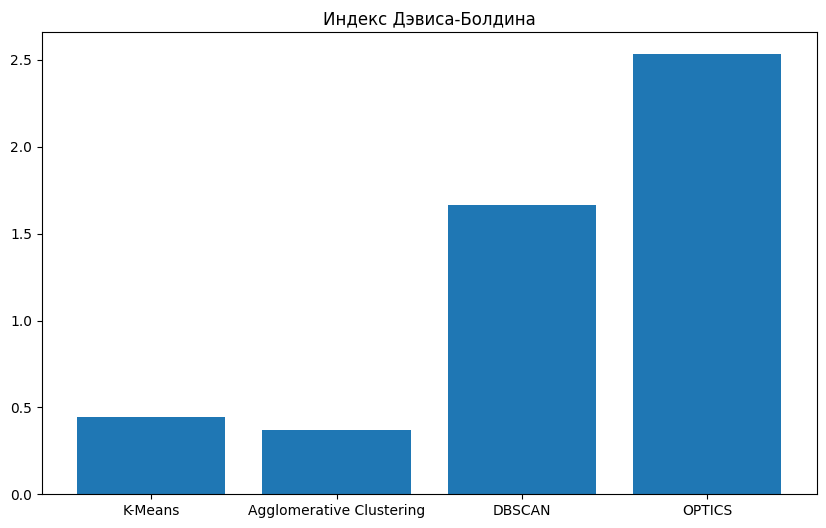

In [62]:
plt.figure(figsize=(10,6))
plt.bar(['K-Means', 'Agglomerative Clustering', 'DBSCAN', 'OPTICS'], [davies_bouldin_score_kmeans, davies_bouldin_score_agg_clustering, davies_bouldin_score_dbscan, davies_bouldin_score_optics])
plt.title('Индекс Дэвиса-Болдина')

In [63]:
calinski_harabasz_score_kmeans = calinski_harabasz_score(x_lite, pred_kmeans)
calinski_harabasz_score_agg_clustering = calinski_harabasz_score(x_lite, pred_agg_clustering)
calinski_harabasz_score_dbscan = calinski_harabasz_score(x_lite, pred_dbscan)
calinski_harabasz_score_optics = calinski_harabasz_score(x_lite, pred_optics)

<BarContainer object of 4 artists>

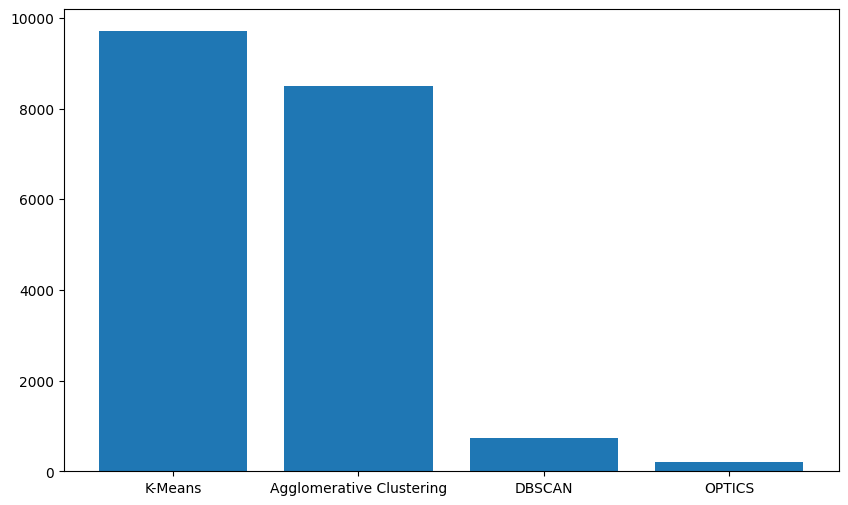

In [64]:
plt.figure(figsize=(10,6))
plt.bar(['K-Means', 'Agglomerative Clustering', 'DBSCAN', 'OPTICS'], [calinski_harabasz_score_kmeans, calinski_harabasz_score_agg_clustering, calinski_harabasz_score_dbscan, calinski_harabasz_score_optics])

Внешние метрики не получить, т.к. истинных классов нет.


**4.3. Сравнение алгоритмов:**

- Составьте таблицу со значениями метрик для каждого алгоритма.
- Определите, какой алгоритм показал наилучшие результаты и почему.

In [65]:
metrics_table = pd.DataFrame({
    'Algorithm': ['K-Means', 'Agglomerative Clustering', 'DBSCAN', 'OPTICS'],
    'Silhouette Score': [silhouette_score_kmeans, silhouette_score_agg_clustering, silhouette_score_dbscan, silhouette_score_optics],
    'Davies-Bouldin Score': [davies_bouldin_score_kmeans, davies_bouldin_score_agg_clustering, davies_bouldin_score_dbscan, davies_bouldin_score_optics],
    'Calinski-Harabasz Score': [calinski_harabasz_score_kmeans, calinski_harabasz_score_agg_clustering, calinski_harabasz_score_dbscan, calinski_harabasz_score_optics]
})

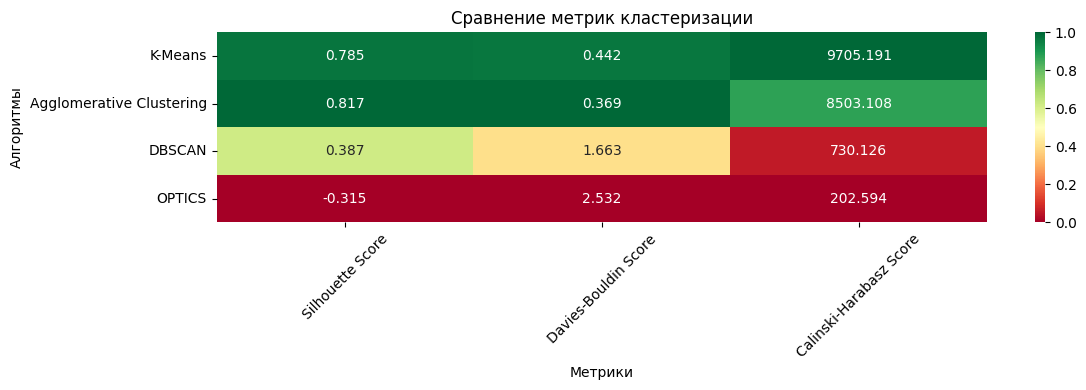

In [66]:
fig, ax = plt.subplots(figsize=(12, 4))
plot_data = pd.DataFrame(index=metrics_table['Algorithm'])
for col in metrics_table.columns[1:]:
    values = metrics_table[col].values
    if col == 'Davies-Bouldin Score':
        normalized = (max(values) - values) / (max(values) - min(values))
    else:
        normalized = (values - min(values)) / (max(values) - min(values))

    plot_data[col] = normalized

sns.heatmap(plot_data,
            annot=metrics_table.iloc[:, 1:].values,
            fmt='.3f',
            cmap='RdYlGn',
            yticklabels=metrics_table['Algorithm'],
            vmin=0, vmax=1)

plt.title('Сравнение метрик кластеризации')
plt.xlabel('Метрики')
plt.ylabel('Алгоритмы')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Лучшие результаты показали K-means и agglomerative clustering

#### **Шаг 5: Интерпретация и визуализация результатов**

In [67]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans, DBSCAN, OPTICS, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.utils import resample
from google.colab import drive

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

**5.1. Визуализация кластеров:**

- **Снижение размерности:** Примените PCA или t-SNE для отображения данных в 2D или 3D пространстве.
- **Постройте графики:**
  - Рассеивания с цветовой кодировкой кластеров.
  - Дендрограммы для иерархической кластеризации.


In [68]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_lite)

Text(0.5, 1.0, 'Кластеризация K-Means')

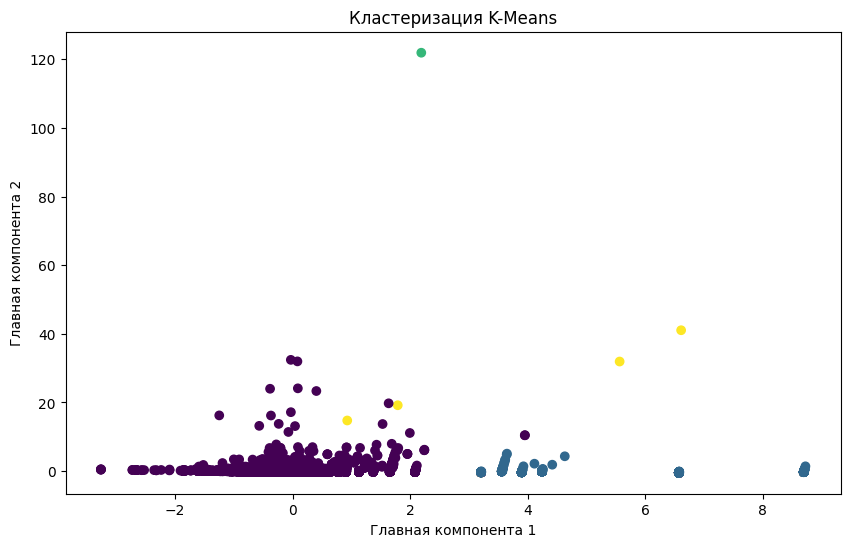

In [69]:
plt.figure(figsize=(10,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=ds_lite['cluster_kmeans'])
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('Кластеризация K-Means')

In [70]:
linkage_matrix = linkage(x_lite, method='ward')

Text(0.5, 1.0, 'Дендрограмма для иерархической кластеризации')

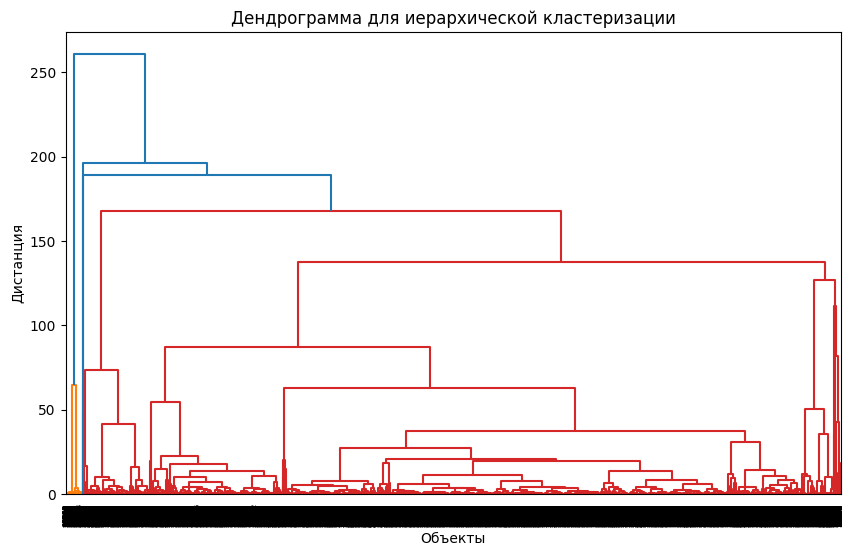

In [71]:
plt.figure(figsize=(10,6))
dendrogram(linkage_matrix)
plt.xlabel('Объекты')
plt.ylabel('Дистанция')
plt.title('Дендрограмма для иерархической кластеризации')

- **Визуализация признаков:**
  - Постройте боксплоты, гистограммы или тепловые карты для сравнения признаков между кластерами

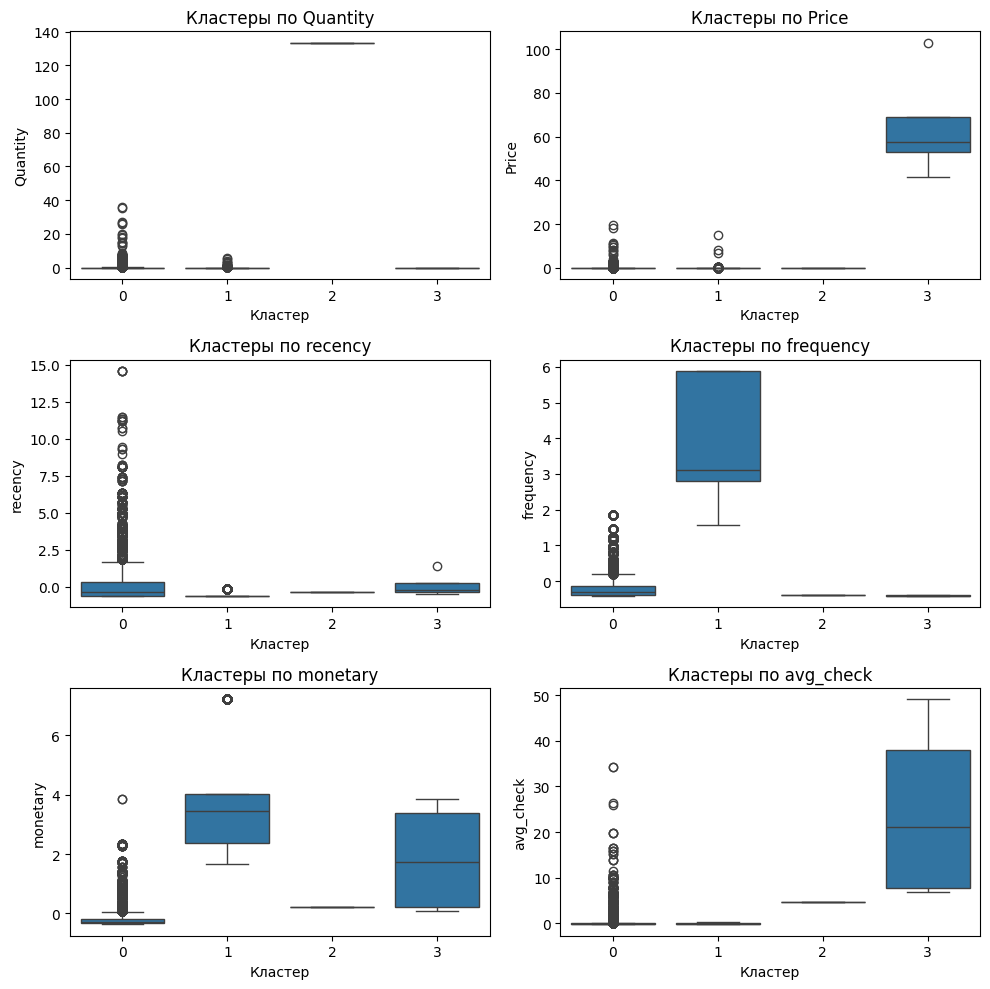

In [72]:
plt.figure(figsize=(10,10))
for i, feature in enumerate(numeric_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='cluster_kmeans', y=feature, data=ds_lite)
    plt.title(f'Кластеры по {feature}')
    plt.xlabel('Кластер')
    plt.ylabel(feature)
plt.tight_layout()

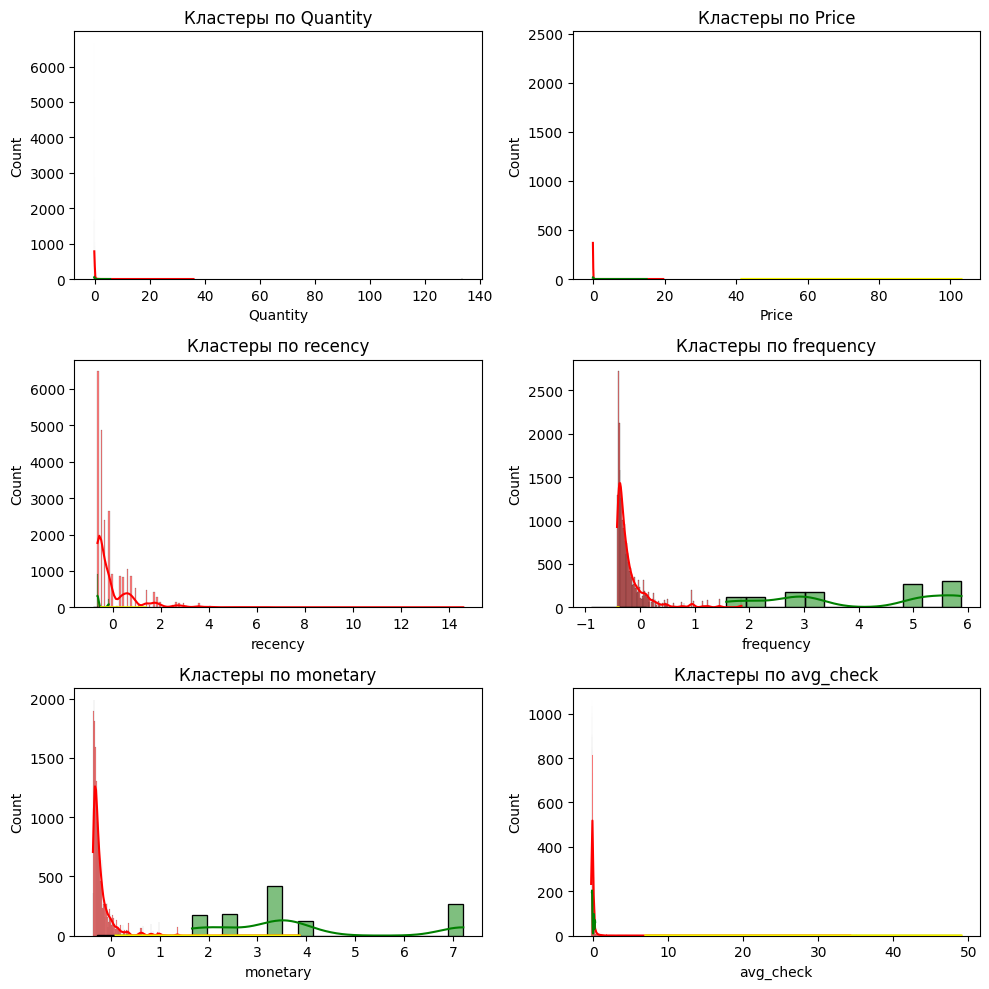

In [73]:
plt.figure(figsize=(10,10))
for i, feature in enumerate(numeric_columns):
    plt.subplot(3, 2, i+1)
    sns.histplot(x_lite[feature][pred_kmeans == 0], color='red', label='Кластер 0', kde=True)
    sns.histplot(x_lite[feature][pred_kmeans == 1], color='green', label='Кластер 1', kde=True)
    sns.histplot(x_lite[feature][pred_kmeans == 2], color='blue', label='Кластер 2', kde=True)
    sns.histplot(x_lite[feature][pred_kmeans == 3], color='yellow', label='Кластер 3', kde=True)
    sns.histplot(x_lite[feature][pred_kmeans == 4], color='orange', label='Кластер 4', kde=True)
    sns.histplot(x_lite[feature][pred_kmeans == 5], color='pink', label='Кластер 5', kde=True)
    sns.histplot(x_lite[feature][pred_kmeans == 6], color='cyan', label='Кластер 6', kde=True)
    sns.histplot(x_lite[feature][pred_kmeans == 7], color='black', label='Кластер 7', kde=True)
    sns.histplot(x_lite[feature][pred_kmeans == 8], color='brown', label='Кластер 8', kde=True)
    plt.title(f'Кластеры по {feature}')
    plt.xlabel(feature)
plt.tight_layout()

In [74]:
numeric_columns_kmeans = numeric_columns[:-1] + ['cluster_kmeans']
numeric_columns_kmeans

['Quantity', 'Price', 'recency', 'frequency', 'monetary', 'cluster_kmeans']

Text(0.5, 1.0, 'Корреляция признаков для K-Means')

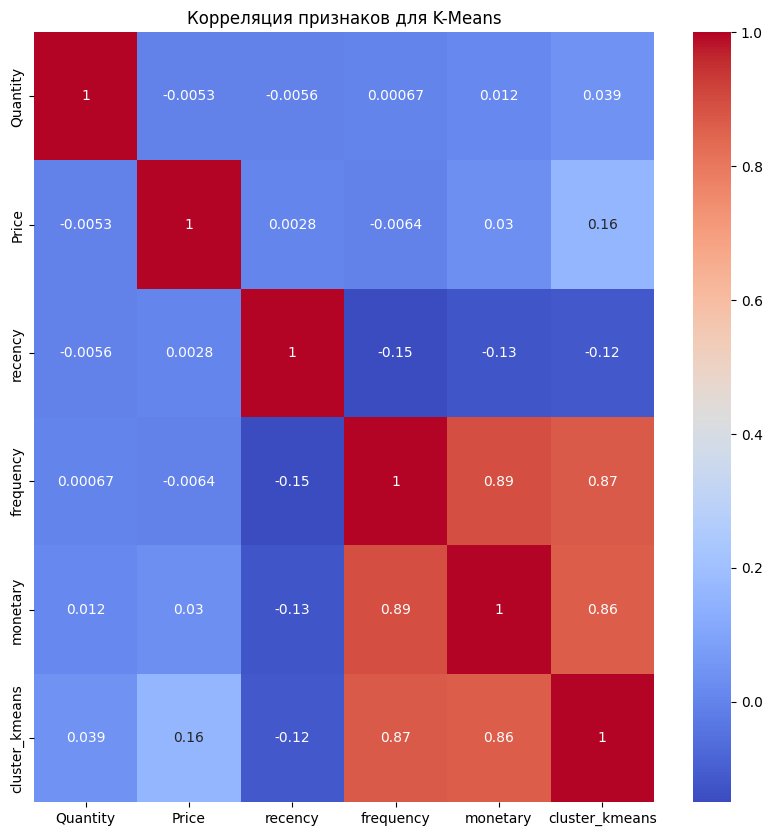

In [75]:
corr_mat_kmeans = ds_lite[numeric_columns_kmeans].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_mat_kmeans, annot=True, cmap='coolwarm')
plt.title('Корреляция признаков для K-Means')

**5.2. Описание сегментов:**

- Для каждого кластера опишите характерные черты:
  - Средние значения признаков.
  - Поведенческие особенности (например, частота покупок, средний чек).
  - Демографические характеристики (если доступны).
- Присвойте сегментам осмысленные названия (например, "Лояльные клиенты", "Покупатели со сниженной активностью", "Большие транзакции").

In [76]:
average_by_cluster = ds_lite.groupby('cluster_kmeans')[numeric_columns[:-1]].mean()
assosiated_country_by_cluster = ds_lite.groupby('cluster_kmeans')['Country'].apply(lambda x: x.value_counts().idxmax())
average_by_cluster_with_countries = pd.concat([average_by_cluster, assosiated_country_by_cluster], axis=1)
average_by_cluster_with_countries

,Quantity,Price,recency,frequency,monetary,Country
cluster_kmeans,,,,,,
0,0.000592,-0.006131,0.013907,-0.195900,-0.192016,United Kingdom
1,-0.031401,0.009149,-0.538368,4.004961,3.945517,United Kingdom
2,133.514050,-0.045849,-0.322097,-0.396656,0.209553,United Kingdom
3,-0.133458,64.868296,0.105100,-0.406520,1.857576,United Kingdom


In [77]:
loyal_clients = average_by_cluster_with_countries.sort_values(by='frequency', ascending=False).head(1)
inactive_clients = average_by_cluster_with_countries.sort_values(by='recency').head(1)
most_monetary_clients = average_by_cluster_with_countries.sort_values(by='monetary', ascending=False).head(1)
most_purchases_clients = average_by_cluster_with_countries.sort_values(by='Quantity', ascending=False).head(1)

In [78]:
cluster_names = {
    0: 'loyal_clients',
    1: 'inactive_clients',
    2: 'most_monetary_clients',
    3: 'most_purchases_clients'
}
ds_lite['class'] = ds_lite['cluster_kmeans'].map(cluster_names)
ds_lite


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Month,...,recency,frequency,monetary,avg_check,preffered_category,cluster_kmeans,cluster_agg_clustering,cluster_dbscan,cluster_optics,class
66086,495331,21936,RED/WHITE SPOT PICNIC BAG,-0.133458,2010-01-22 16:28:00,-0.019251,17799.0,United Kingdom,2010,1,...,-0.322097,0.031558,-0.106468,-0.160783,"(17799.0, 'REX CASH+CARRY JUMBO SHOPPER')",0,0,0,-1,loyal_clients
515967,537666,71143,SILVER BOOK MARK WITH BEADS,-0.120092,2010-12-07 18:36:00,-0.023586,17132.0,United Kingdom,2010,12,...,-0.632785,-0.380297,-0.338346,-0.105494,"(17132.0, 'WHITE HANGING HEART T-LIGHT HOLDER')",0,0,0,-1,loyal_clients
161792,504916,21864,UNION JACK FLAG PASSPORT COVER,-0.133458,2010-04-19 10:28:00,-0.006839,15434.0,United Kingdom,2010,4,...,0.299280,-0.349023,-0.313201,-0.099634,"(15434.0, 'CHOCOLATE HOT WATER BOTTLE')",0,0,0,-1,loyal_clients
719174,554058,22678,FRENCH BLUE METAL DOOR SIGN 3,-0.093359,2011-05-20 16:04:00,-0.035998,17757.0,United Kingdom,2011,5,...,-0.632785,0.217760,0.032940,-0.145580,"(17757.0, 'PICNIC BASKET WICKER SMALL')",0,0,0,-1,loyal_clients
1032538,579539,22809,SET OF 6 T-LIGHTS SANTA,-0.066627,2011-11-30 10:06:00,-0.019251,14911.0,EIRE,2011,11,...,-0.632785,5.165323,7.213636,0.090182,"(14911.0, 'CARRIAGE')",1,1,1,-1,inactive_clients
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525908,536749,18097C,WHITE TALL PORCELAIN T-LIGHT HOLDER,-0.133458,2010-12-02 13:49:00,-0.023192,17976.0,United Kingdom,2010,12,...,1.697378,-0.349986,-0.304105,-0.061583,"(17976.0, 'AIRLINE BAG VINTAGE TOKYO 78')",0,0,0,-1,loyal_clients
799325,561241,21124,SET/10 BLUE POLKADOT PARTY CANDLES,0.173962,2011-07-26 11:00:00,-0.035998,13930.0,United Kingdom,2011,7,...,0.299280,-0.405798,-0.354381,-0.068581,"(13930.0, '3 PIECE SPACEBOY COOKIE CUTTER SET')",0,0,0,-1,loyal_clients
176586,506262,21557,SET OF 6 FUNKY BEAKERS,-0.066627,2010-04-28 14:45:00,-0.019251,12839.0,United Kingdom,2010,4,...,-0.322097,-0.134916,-0.232926,-0.192373,"(12839.0, 'STRAWBERRY CHARLOTTE BAG')",0,0,0,0,loyal_clients
783332,559933,23104,IVORY CAFE HANGING LAMP,-0.120092,2011-07-14 09:54:00,0.074826,16719.0,United Kingdom,2011,7,...,1.542034,-0.198426,-0.178040,-0.073742,"(16719.0, 'CHILLI LIGHTS')",0,0,0,-1,loyal_clients


In [79]:
ds_lite.to_csv('/content/drive/MyDrive/Maga/data_mining/laba10/ds_lite_clustered_with_class.csv',index=False)

#### **Шаг 6: Формирование бизнес-рекомендаций**

**6.1. Анализ потребностей каждого сегмента:**

- Определите потребности и предпочтения клиентов в каждом сегменте.
- Выявите возможности для увеличения продаж и улучшения сервиса.

In [80]:
preferred_category_by_cluster = ds_lite.groupby('class')['preffered_category'].apply(lambda x: x.value_counts().idxmax())
preferred_category_by_cluster

,preffered_category
class,
inactive_clients,"(17841.0, 'CHILLI LIGHTS')"
loyal_clients,"(15311.0, 'EDWARDIAN PARASOL BLACK')"
most_monetary_clients,"(17940.0, 'PACK OF 12 LONDON TISSUES ')"
most_purchases_clients,"(15262.0, 'HEART OF WICKER SMALL')"


**6.2. Разработка стратегий для каждого сегмента:**

- **Маркетинговые кампании:**
  - Персонализированные предложения.
  - Программы лояльности для удержания ценных клиентов.
- **Оптимизация продуктов:**
  - Расширение ассортимента для популярных сегментов.
  - Фокус на продуктах, интересных конкретным сегментам.





**6.3. Оценка потенциального влияния:**

- Оцените, как предложенные стратегии могут повысить выручку, удовлетворенность клиентов и другие ключевые показатели.

# <font color='red'>ВАШ ОТВЕТ</font>

#### **Шаг 7: Документирование и презентация результатов**

**7.1. Подготовка отчета:**

- **Введение:**
  - Описание цели работы и её значимости для бизнеса.
- **Методология:**
  - Подробное описание проведенных шагов.
- **Результаты:**
  - Представление метрик оценки и визуализаций.
  - Описание сегментов клиентов.
- **Обсуждение:**
  - Анализ полученных результатов.
  - Сравнение алгоритмов и обоснование выбора.
- **Рекомендации:**
  - Предложения по внедрению результатов в бизнес-процессы.
- **Заключение:**
  - Выводы о проделанной работе и её значимости.

**7.2. Презентация:**

- Подготовьте слайды для представления ключевых моментов работы.
- Используйте визуализации для иллюстрации результатов.
- Готовьтесь ответить на вопросы аудитории.

**7.3. Код и reproducibility:**

- Организуйте код в репозитории (например, GitHub) с понятной структурой.
- Приложите инструкции для воспроизведения результатов.

